In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fix_value(x: str) -> str:
    if x.find('.') == -1:
        return x
    else:
        return x[:len(x) - 1].replace('.', '')

In [3]:
df = pd.read_csv('../data.csv', index_col = 0)
df_preprocessed = pd.read_csv('../preprocessed_data.csv', index_col = 0)

In [4]:
df['Value'] = df['Value'].replace({
    '€': '',
    'M': '000000',
    'K': '000'
}, regex=True).map(fix_value).convert_objects(convert_numeric=True)

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [5]:
position_to_num = {
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.2,
    'RCB': 1.6,
    'LB': 2.7,
    'RB': 3.2,
    'LWB': 4.5,
    'RWB': 4.6,
    'CM': 6,
    'LCM': 6.2,
    'RCM': 6.4,
    'CDM': 5,
    'LDM': 5.1,
    'RDM': 5.3,
    'LM': 6.5,
    'RM': 6.7,
    'RAM': 7.3,
    'CAM': 7,
    'LAM': 7.1,
    'LW': 8.2,
    'RW': 8.4,
    'CF': 9.1,
    'LF': 9.2,
    'RF': 9.4,
    'LS': 9.5,
    'RS': 9.7,
    'ST': 10
}
df['Position'].replace(position_to_num, inplace=True)

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


0.17618940731631963


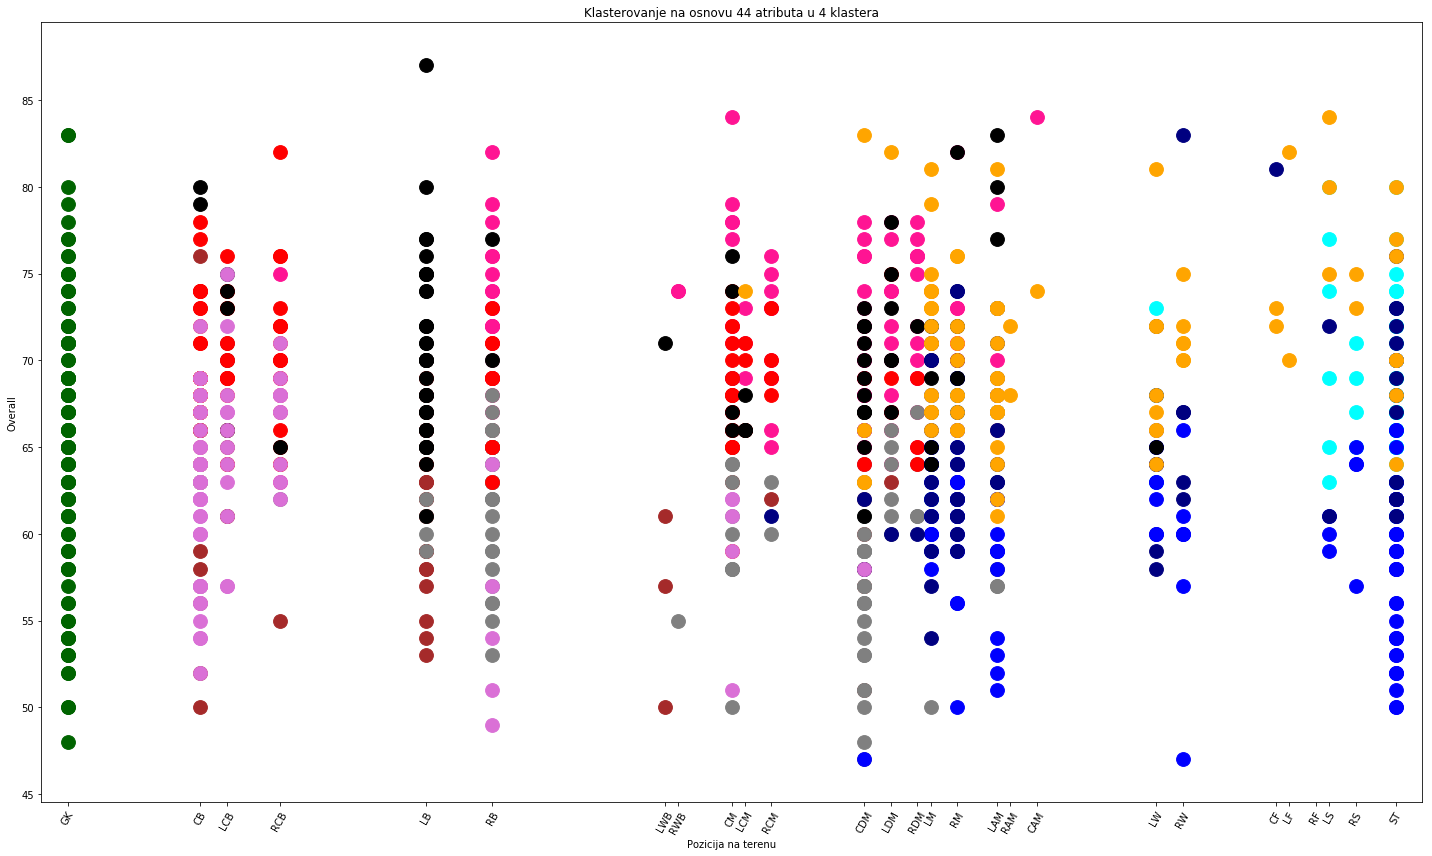

In [11]:
est_kmeans = KMeans(n_clusters=11, max_iter=20000, tol=1e-5).fit(df_preprocessed.drop('Value', axis = 1))
df['Labels'] = est_kmeans.labels_

colors = ['deeppink', 'darkgreen', 'brown', 'cyan',
         'grey', 'red', 'blue', 'navy',
         'black', 'orange', 'orchid']
fig = plt.figure(figsize=(20, 12))

for j in range(11):
    cluster = df.sample(1000)[df['Labels'] == j]
    plt.scatter(cluster['Position'], cluster['Overall'], color = colors[j], label ='Cluster %d'%j, s = 190, alpha=1)

# plt.axvspan(-0.1, 0.9, facecolor='green', alpha = 0.3)
# plt.axvspan(0.9, 4.6, facecolor='green', alpha = 0.4)
# plt.axvspan(4.6, 7.1, facecolor='green', alpha = 0.5)
# plt.axvspan(7.1, 10.1, facecolor='green', alpha = 0.6)
# plt.tick_params(axis='y', which='major')

plt.xlim(-0.2, 10.2)

plt.xticks(np.array([v for k,v in position_to_num.items()]), ('GK', 'CB', 'LCB', 'RCB', 'LB', 'RB'
                         ,'LWB', 'RWB', 'CDM', 'LDM', 'RDM'
                         ,'CM', 'LCM', 'RCM', 'LM', 'RM', 'CAM'
                         , 'LAM', 'RAM', 'LW', 'RW', 'CF', 'LF'
                         , 'RF', 'LS', 'RS', 'ST'), rotation=60)
plt.title('Klasterovanje na osnovu 44 atributa u 4 klastera')
#plt.legend()
plt.xlabel("Pozicija na terenu")
plt.ylabel("Overall")
print(silhouette_score(df_preprocessed, est_kmeans.labels_))

plt.tight_layout()
plt.savefig("../kmeans_11")

0.17393828648644208